In [16]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [17]:
seo = pd.read_csv('seo_traffic.csv')
seo.head()

,ds,y
0,01/01/2018,43833
1,02/01/2018,60378
2,03/01/2018,54339
3,04/01/2018,51693
4,05/01/2018,43408


In [30]:
len(seo)

412

In [31]:
seo['ds'] = pd.to_datetime(seo['ds'])
seo['y'] = pd.to_numeric(seo['y'])

In [32]:
seo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 2 columns):
ds    412 non-null datetime64[ns]
y     412 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.5 KB


In [20]:
#valentines = pd.DataFrame({
#    'holiday': 'valentines',
#    'ds': pd.to_datetime(['2019-02-12','2019-02-13','2019-02-14']),
#    'lower_window': 0,
#    'upper_window': 0,
#})
#
#mothers_day = pd.DataFrame({
#    'holiday': 'mothers day',
#    'ds': pd.to_datetime(['2019-03-28','2019-03-29','2019-03-30','2019-03-31']),
#    'lower_window': 0,
#    'upper_window': 0,
#})
#
#holidays = pd.concat((valentines, mothers_day))

In [21]:
model = Prophet(yearly_seasonality=True)
model.add_country_holidays(country_name='UK')

In [22]:
model.fit(seo)

C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [23]:
future = model.make_future_dataframe(periods=90, freq='D')
future.tail()

,ds
497,2020-02-26
498,2020-02-27
499,2020-02-28
500,2020-02-29
501,2020-03-01


In [24]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
497,2020-02-26,37315.032254,16664.881321,57281.655124
498,2020-02-27,34555.172718,15253.669438,53917.857595
499,2020-02-28,34765.492476,16426.394414,55419.346703
500,2020-02-29,30751.314855,12176.591115,51154.293265
501,2020-03-01,39557.698837,19814.255856,58585.761510


In [28]:
import matplotlib.pyplot as plt

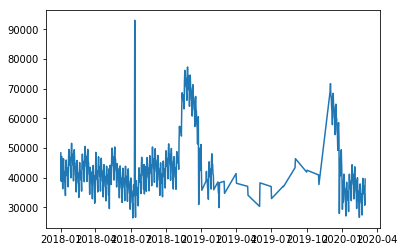

In [29]:
plt.plot(forecast['ds'], forecast['yhat'])

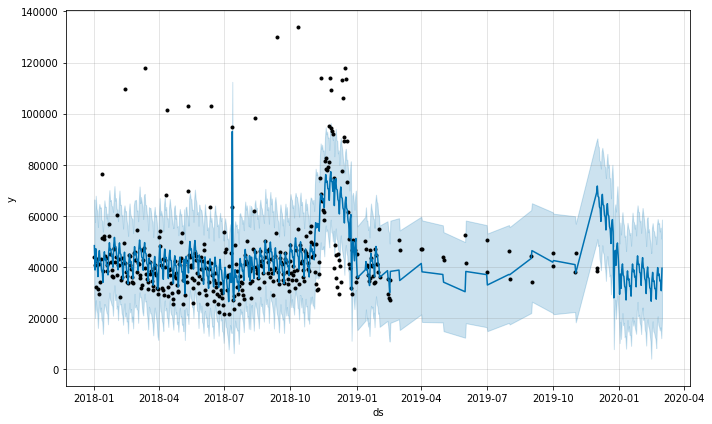

In [27]:
plot = model.plot(forecast)

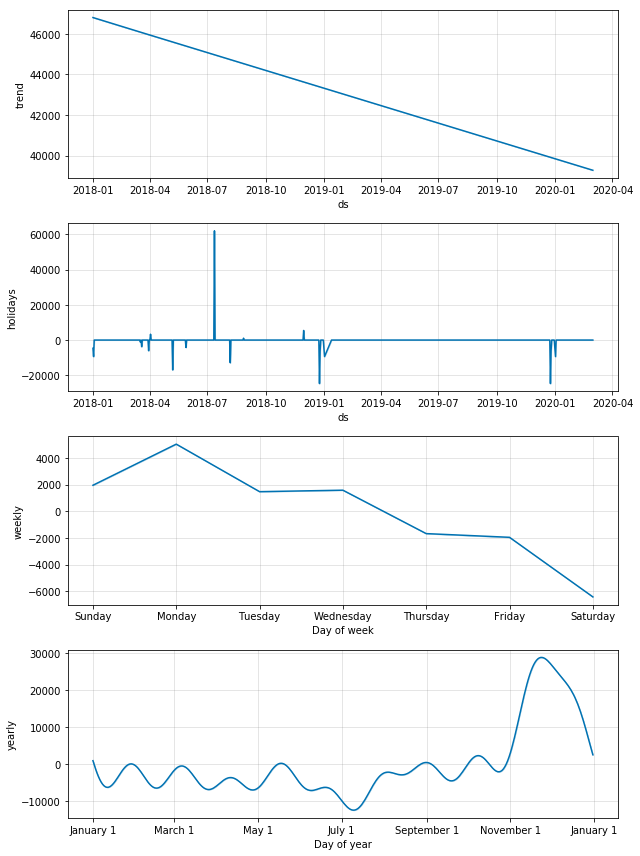

In [11]:
plot_components = model.plot_components(forecast)

In [12]:
model.train_holiday_names

0                                        New Year's Day
1                           New Year Holiday [Scotland]
2                  St. Patrick's Day [Northern Ireland]
3       St. Patrick's Day [Northern Ireland] (Observed)
4                                           Good Friday
5      Easter Monday [England, Wales, Northern Ireland]
6                                               May Day
7                                   Spring Bank Holiday
8                Battle of the Boyne [Northern Ireland]
9                        Summer Bank Holiday [Scotland]
10    Late Summer Bank Holiday [England, Wales, Nort...
11                          St. Andrew's Day [Scotland]
12                                        Christmas Day
13                                           Boxing Day
dtype: object

In [15]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='365 days', period='90 days', horizon = '120 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2019-02-05 00:00:00 and 2019-08-04 00:00:00
C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\felix.therrien\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-13,40645.571238,21666.197169,59353.635839,35272,2019-02-05
1,2019-02-14,36785.294980,17972.084966,55536.447334,29533,2019-02-05
2,2019-02-15,36734.611892,17369.794051,55958.613189,27885,2019-02-05
3,2019-02-16,31262.702626,12169.235466,49849.227945,27274,2019-02-05
4,2019-02-17,40822.938855,20951.401903,60486.432555,34760,2019-02-05


In [ ]:
#forecast.to_csv('seo forecast 2',index=False, sep=":")